<a href="https://colab.research.google.com/github/codewithhoney24/Project_4-Assignments/blob/main/Assignments%201%20to%206/QR_code_encoder_decoder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QR code encoder / decoder Python Project**

Enter text to encode in QR Code: hello123
Enter file format (png/jpg): jpg
✅ QR Code saved as qrcode.jpg


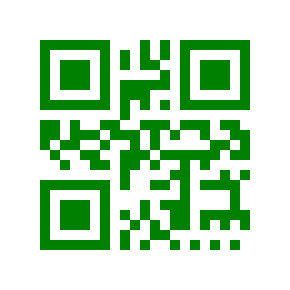

✅ Decoded QR Code Data: hello123


In [5]:
!pip install qrcode opencv-python pillow numpy

import qrcode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def generate_qr_code(data, filename="qrcode", file_format="png"):
    """
    Generates a QR code with green color and saves it in the specified format.
    """
    qr = qrcode.QRCode(
        version=1,  # Controls the size of the QR code
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    # Create QR code with green color
    img = qr.make_image(fill_color="green", back_color="white")

    # Save QR Code in user-selected format
    filename = f"{filename}.{file_format}"
    img.save(filename)
    print(f"✅ QR Code saved as {filename}")

    return filename

def decode_qr_code(filename="qrcode.png"):
    """
    Decodes a QR code image and prints the extracted data.
    """
    img = cv2.imread(filename)
    detector = cv2.QRCodeDetector()
    data, _, _ = detector.detectAndDecode(img)

    if data:
        print("✅ Decoded QR Code Data:", data)
    else:
        print("❌ No QR Code detected!")

# User Input for QR Code
text = input("Enter text to encode in QR Code: ")
file_format = input("Enter file format (png/jpg): ").strip().lower()

if file_format not in ["png", "jpg"]:
    print("❌ Invalid format! Defaulting to PNG.")
    file_format = "png"

filename = generate_qr_code(text, file_format=file_format)

# Display the generated QR Code in Google Colab
img = cv2.imread(filename)
cv2_imshow(img)

# Decode the QR Code
decode_qr_code(filename)
